# OBJECTIVE
This is supposed to be an introductory notebook for performing exploratory data analysis on data.

## What is Exploratory Data Analysis?
Exploratory Data Analysis or EDA is used to make or extract insights from the data. Data Scientists and Analysts try to find different patterns, relations, and anomalies in the data using some statistical graphs and other visualization techniques. EDA mainky consists of the following:

- Get maximum insights from a dataset
- Uncover underlying structure
- Extract important variables from the dataset
- Detect outliers and anomalies(if any)
- Test underlying assumptions
- Determine the optimal factor settings

## Why EDA is important?

The main purpose of EDA is to detect any errors, outliers as well as to understand different patterns in the data. It allows Analysts to understand the data better before making any assumptions. The outcomes of EDA helps businesses to know their customers, expand their business and take decisions accordingly.

## How to perform EDA?
To understand EDA better let us take an example. We will be using [Automobile Dataset](https://www.kaggle.com/toramky/automobile-dataset?select=Automobile_data.csv) for analysis.

Import Libraries and Load Dataset

In [1]:
#library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns


In [11]:
#loading dataset and display first 5 records to confirm load
auto_raw = pd.read_csv('data/automobile_data/Automobile_data.csv')



In [12]:
auto_raw.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


It is evident from the above head output from the dataset has 26 entries. It can also be seen that the dataset has some '?' in some columns; these denote missing values from source. We would replace those in subsequent steps. The prices are the targets for this dataset.


In [49]:
auto_raw.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

## Checking for missing values

In [14]:
auto_raw.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

From the output above, it is showing that we don’t have any null values in our dataset but we have observed earlier that there were ‘?’ symbols in the dataset, which means that these symbols are in the form of an object.  Let us now check the data types of each attribute.

In [15]:
auto_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

The code output above indicate that the columns with symbols are of type objects. Clearly, there are some fields that should be of type int or float but are shown as object. For example, the normalized-losses should be an int.  Now let us detect which columns have symbols and if there are any other symbols too.

In [17]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in auto_raw.columns:
    print('{} : {}'.format(col,auto_raw[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four' '?']
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

There are null values in our dataset in form of ‘?’ only but pandas are not reading them so we will replace them into np.nan form.

In [24]:
for col in auto_raw.columns:
    auto_raw[col].replace({'?':np.nan, }, inplace=True)


In [25]:
auto_raw.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Now we can observe that the ‘?’ symbols have been converted into NaN form. Let us check for missing values again.

In [27]:
auto_raw.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

We can now visualize that there are some missing values in the columns

## Visualizing the missing values
With the help of heatmap, we can see the amount of data that is missing from the attribute. With this, we can make decisions whether to drop these missing values or to replace them. Usually dropping the missing values is not advisable but sometimes it may be helpful too.

<AxesSubplot:>

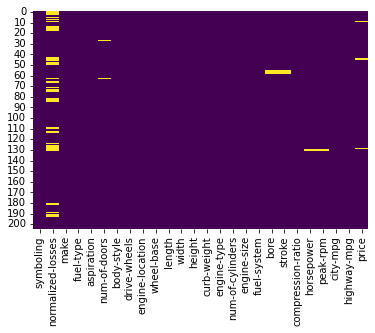

In [29]:
sns.heatmap(auto_raw.isnull(),cbar=False,cmap='viridis')

Now observe that there are many missing values in normalized_losses while other columns have fewer missing values. We can’t drop the normalized_losses column as it may be important for our prediction.

## Replacing the missing values
We will be replacing these missing values with mean because the number of missing values is less(we can use median too).

In [32]:
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in num_col:
    auto_raw[col]=pd.to_numeric(auto_raw[col])
    auto_raw[col].fillna(auto_raw[col].mean(), inplace=True)
auto_raw.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


We can observe that now our missing values are replaced with mean.

## Asking Analytical Questions and Visualizations
This is the most important step in EDA. This step will decide how much can you think as an Analyst. This step varies from person to person in terms of their questioning ability. Try to ask questions related to independent variables and the target variable. For example – how fuel_type will affect the price of the car?

Before this let us check the correlation between different variables, this will give us a roadmap on how to proceed further.

<AxesSubplot:>

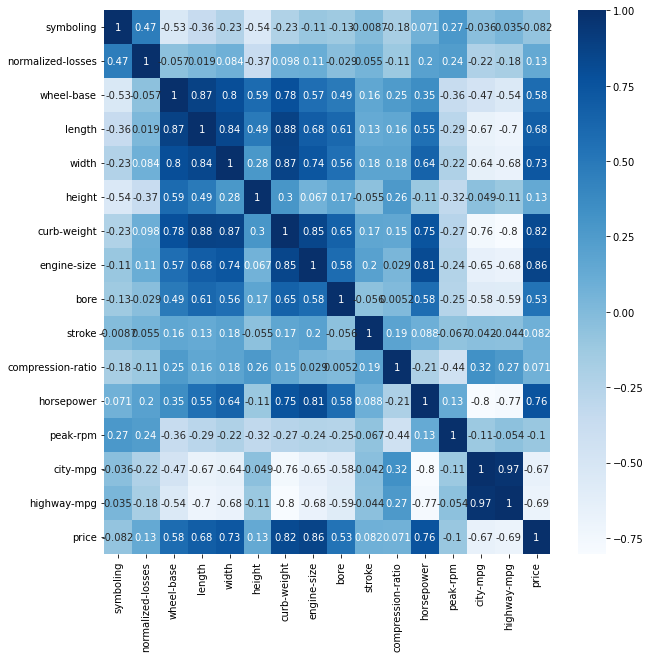

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(auto_raw.corr(),cbar=True,annot=True,cmap='Blues')

Positive Correlation
- Price – wheel_base, length, width, curb_weight, engine_size, bore, horsepower
- wheelbase – length, width, height, curb_weight, engine_size, price
- horsepower – length, width, curb_weight, engine_size, bore, price
- Highway mpg – city mpg

Negative Correlation
- Price – highway_mpg, city_mpg
- highway_mpg – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price
- city – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price

This heatmap has given us great insights into the data.


Now let us apply domain knowledge and ask the questions which will affect the price of the automobile.

## Q1. How does the horsepower affect the price?

Text(0, 0.5, 'Price')

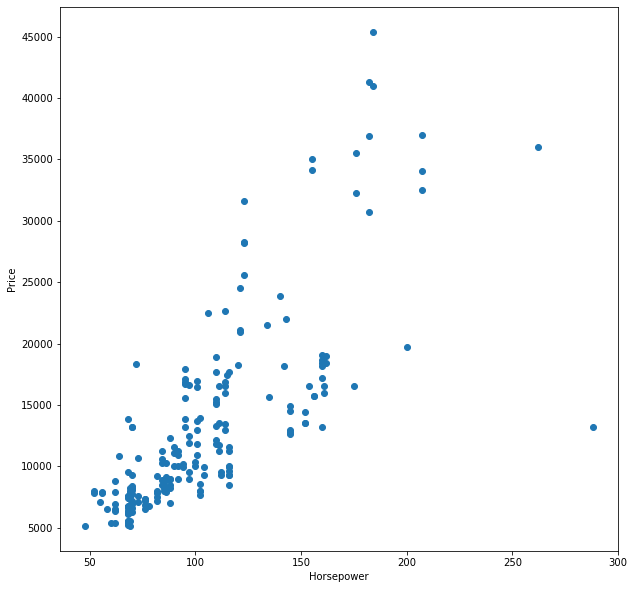

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(x='horsepower',y='price',data=auto_raw)
plt.xlabel('Horsepower')
plt.ylabel('Price')

We can see that most of the horsepower value lies between 50-150 has price mostly between 5000-25000, there are outliers also(between 200-300).

Let’s see a count between 50-100 i.e univariate analysis of horsepower.

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

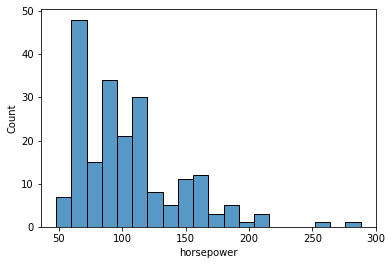

In [50]:
sns.histplot(auto_raw.horsepower,bins=20)

The average count between 50-100 is 50 and it is positively skewed.

## Q2. What is the relation between engine-size and price?

Text(0, 0.5, 'Price')

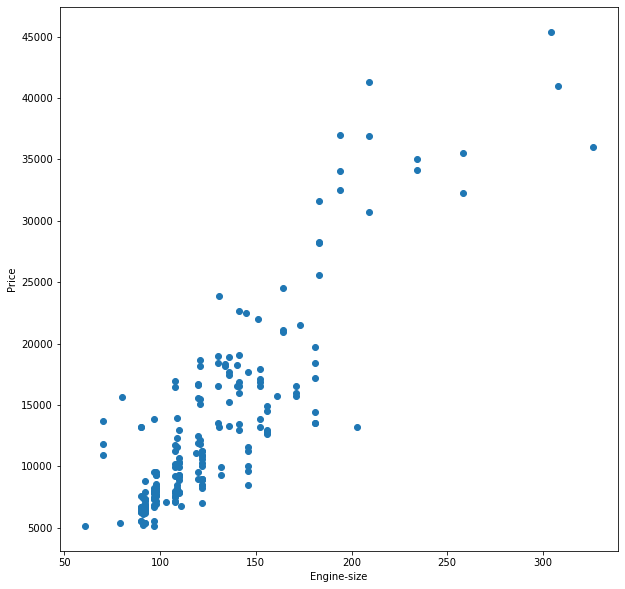

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(x='engine-size',y='price',data=auto_raw)
plt.xlabel('Engine-size')
plt.ylabel('Price')

We can observe that the pattern is similar to horsepower vs price.

## Q3. How does highway-mpg affects price?

Text(0, 0.5, 'Price')

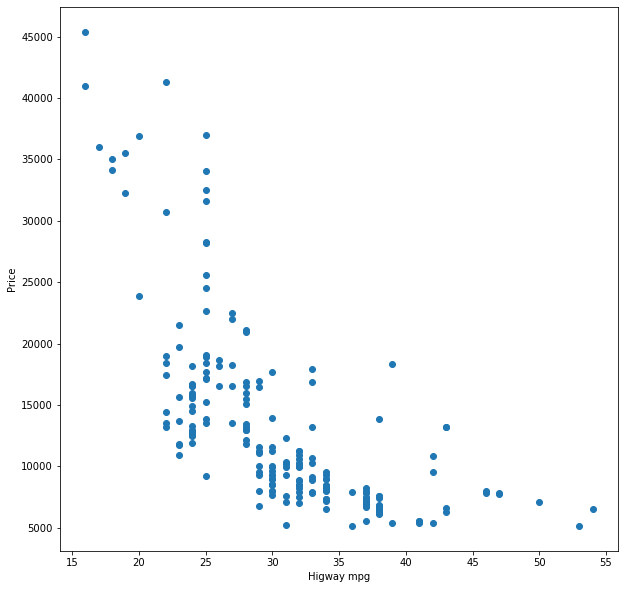

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(x='highway-mpg',y='price',data=auto_raw)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

We can see price decreases with an increase in higway_mpg.

Let us check the number of doors.

In [46]:
#Unique values in num_of_doors
auto_raw['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

## Q4. Relation between no. of doors and price

We will use a boxplot for this analysis.

<AxesSubplot:xlabel='price', ylabel='num-of-doors'>

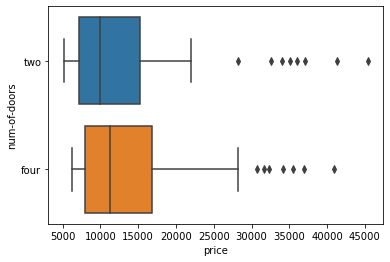

In [48]:
sns.boxplot(x='price',y='num-of-doors',data=auto_raw)

With this boxplot, we can conclude that the average price of a vehicle with two doors is 10000,  and the average price of a vehicle with four doors is 12000.

With this plot, we have gained enough insights from data and our data is ready to build a model.